## Mining Polish Bankruptcy Data
<table><tr><td><img src='resources/img_0.jpg'></td><td><img src='resources/img_1.jpg'></td><td><img src='resources/img_2.jpg'></td></tr></table>

### A. Import libraries and data

#### (i) libraries

In [1]:
# general utilities
import pandas as pd
import numpy as np
from scipy.io import arff

# classification models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# for displaying / plotting
from IPython.display import display
import matplotlib.pyplot as plt

#### (ii) data
- loading data from arff file<br>
Reference: https://discuss.analyticsvidhya.com/t/loading-arff-type-files-in-python/27419

In [2]:
# import data
years = [1,2,3,4,5]
raw_data = {} # dictionary of dataframe

for year in years:
    arr = arff.loadarff(f"data/year{year}.arff")
    raw_data[f"year{str(year)}"] = pd.DataFrame(arr[0])

In [3]:
# check that the data is correctly load
raw_data["year1"]

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,0.200550,0.37951,0.39641,2.04720,32.3510,0.388250,0.249760,1.330500,1.13890,0.504940,...,0.121960,0.397180,0.87804,0.001924,8.4160,5.1372,82.658,4.4158,7.42770,b'0'
1,0.209120,0.49988,0.47225,1.94470,14.7860,0.000000,0.258340,0.996010,1.69960,0.497880,...,0.121300,0.420020,0.85300,0.000000,4.1486,3.2732,107.350,3.4000,60.98700,b'0'
2,0.248660,0.69592,0.26713,1.55480,-1.1523,0.000000,0.309060,0.436950,1.30900,0.304080,...,0.241140,0.817740,0.76599,0.694840,4.9909,3.9510,134.270,2.7185,5.20780,b'0'
3,0.081483,0.30734,0.45879,2.49280,51.9520,0.149880,0.092704,1.866100,1.05710,0.573530,...,0.054015,0.142070,0.94598,0.000000,4.5746,3.6147,86.435,4.2228,5.54970,b'0'
4,0.187320,0.61323,0.22960,1.40630,-7.3128,0.187320,0.187320,0.630700,1.15590,0.386770,...,0.134850,0.484310,0.86515,0.124440,6.3985,4.3158,127.210,2.8692,7.89800,b'0'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7022,0.018371,0.47410,-0.13619,0.60839,-18.4490,0.018371,0.018371,0.972030,1.01210,0.460840,...,0.011909,0.039866,0.98809,0.274140,73.5050,79.2370,31.268,11.6730,5.14890,b'1'
7023,-0.013359,0.58354,-0.02265,0.92896,-42.2320,-0.013359,-0.015036,0.562890,0.98904,0.328470,...,-0.011082,-0.040671,1.01110,0.805920,10.5990,7.1740,94.092,3.8792,1.75720,b'1'
7024,0.006338,0.50276,0.43923,1.87360,9.7417,0.006338,0.012022,0.983560,1.00830,0.494490,...,0.008258,0.012817,0.99174,0.000000,10.4700,6.0759,51.019,7.1542,62.00100,b'1'
7025,-0.041643,0.84810,-0.12852,0.57485,-121.9200,0.000000,-0.036795,0.179010,0.42138,0.151820,...,-0.232720,-0.274290,0.98788,3.593100,39.7030,3.1420,261.850,1.3939,0.51005,b'1'


### B. Data preparation and exploration

#### (i) inspecting missing values and data type of data
Using year1 data as an example: <br>
- we can observe that the problem of missing values is quite serious, e.g., for Attr37, number of missing values is 2740
- all attributes are in floating point data type, which is desirable
- however, the datatype of our target (class) is byte string, we need to convert it into binary number (int) - 0 or 1

In [4]:
raw_data["year1"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7027 entries, 0 to 7026
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   7024 non-null   float64
 1   Attr2   7024 non-null   float64
 2   Attr3   7024 non-null   float64
 3   Attr4   6997 non-null   float64
 4   Attr5   7019 non-null   float64
 5   Attr6   7024 non-null   float64
 6   Attr7   7024 non-null   float64
 7   Attr8   7002 non-null   float64
 8   Attr9   7026 non-null   float64
 9   Attr10  7024 non-null   float64
 10  Attr11  6988 non-null   float64
 11  Attr12  6997 non-null   float64
 12  Attr13  7027 non-null   float64
 13  Attr14  7024 non-null   float64
 14  Attr15  7025 non-null   float64
 15  Attr16  7002 non-null   float64
 16  Attr17  7002 non-null   float64
 17  Attr18  7024 non-null   float64
 18  Attr19  7027 non-null   float64
 19  Attr20  7027 non-null   float64
 20  Attr21  5405 non-null   float64
 21  Attr22  7024 non-null   float64
 22  

In [5]:
# create a copy of the raw data for processing
data = raw_data.copy()

In [6]:
# fill the NaN values with column mean
for year in years:
    for i in data[f"year{year}"].columns[data[f"year{year}"].isnull().any(axis=0)]:
        data[f"year{year}"].fillna( data[f"year{year}"].mean(), inplace=True)

In [7]:
# double check all dataframe have zero missing values
for year in years:
    if (data[f"year{year}"].isna().sum().sum() == 0):
        print(f"year{year} dataframe contains mo missing values")

year1 dataframe contains mo missing values
year2 dataframe contains mo missing values
year3 dataframe contains mo missing values
year4 dataframe contains mo missing values
year5 dataframe contains mo missing values


For the target variable "class", we need to convert byte into binary variable (0 and 1)

In [8]:
type(data["year1"].iloc[0]["class"])

bytes

In [9]:
# ASCII code for b'0' is 48
# ASCII code for b'1' is 49

# apply change of datatype on the "class" variable

for year in years:
    data[f"year{year}"]["class"] = data[f"year{year}"]["class"].apply(lambda x: 0 if (int.from_bytes(x, "big") == 48)  else 1)

#### (ii) inspecting the distribution of the target variable
Reference: https://stackoverflow.com/questions/10369681/how-to-plot-bar-graphs-with-same-x-coordinates-side-by-side-dodged

- from the graph plotting below, we can observe a seriosu class imbalance in our target variable, while our variable of interest (bankruptcy) is the minority group
- for such imbalanced dataset, evaluation metrics such as precision and recall should be emphasized over accuracy

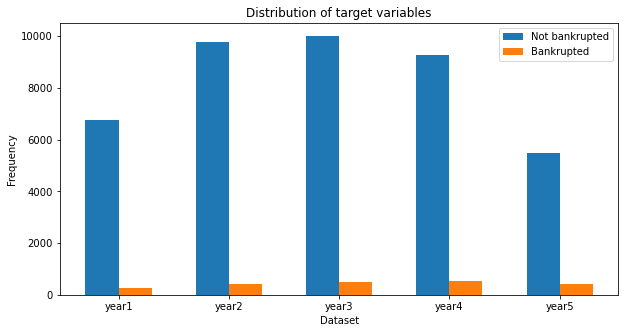

In [10]:
class_0 = []
class_1 = []
x_axis_label = []

for year in years:
    class_0.append(data[f"year{year}"]["class"].value_counts()[0])
    class_1.append(data[f"year{year}"]["class"].value_counts()[1])
    x_axis_label.append(f"year{year}")
    
# position of bars on x-axis
ind = np.arange(5)

# figure size
plt.figure(figsize=(10,5))

# width of bar
width = 0.3

# Plotting
plt.bar(ind, class_0 , width, label="Not bankrupted")
plt.bar(ind + width, class_1, width, label="Bankrupted")
        
plt.xlabel("Dataset")
plt.ylabel("Frequency")
plt.title("Distribution of target variables")

plt.xticks(ind + width / 2, x_axis_label)

# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

### C. Data modeling

We are performing a classification task, and our team will try out the following models:
- Decision Tree Model
- Random Forest Model
- Gaussian Naive Bayes Model
- Logistic Regression Model

### D. Model evaluation